# Importing the required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('dark')
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [2]:
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
train_data.shape

(891, 12)

In [5]:
test_data.shape

(418, 11)

In [6]:
#checking for any duplicates
train_data.duplicated().sum()

0

In [7]:
test_data.duplicated().sum()

0

### Lets now focus on the survival statistics

In [8]:
train_data['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

Text(0.5, 0, 'Survival & Death rate')

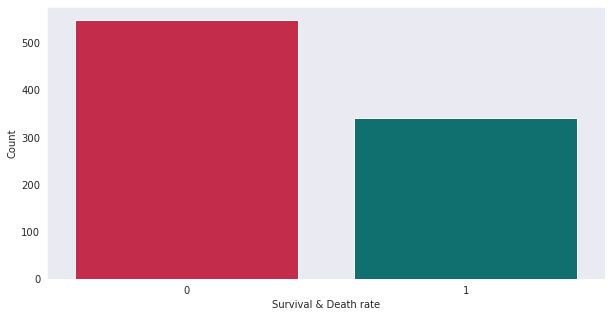

In [9]:
plt.figure(figsize=(10,5))
sns.countplot(x=train_data['Survived'],palette=('crimson', 'teal'))
plt.ylabel('Count')
plt.xlabel('Survival & Death rate')

## Feature Analysis

### Here we will analyze the importance of every feature, so as to select the right one for predicting the survival rate.

### Sex

In [10]:
train_data['Sex'].value_counts().to_frame()

,Sex
male,577
female,314


In [11]:
train_data.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


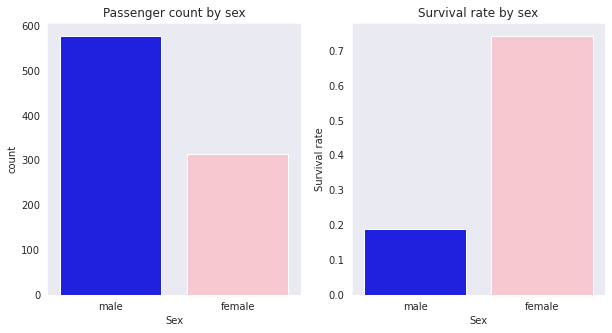

In [12]:
fig, axarr = plt.subplots(1,2,figsize=(10,5))
a = sns.countplot(train_data['Sex'],palette=('blue','pink'),ax=axarr[0]).set_title('Passenger count by sex')
axarr[1].set_title('Survival rate by sex')
b = sns.barplot(x='Sex', y='Survived', data=train_data, palette=('blue','pink'), ci=None, ax=axarr[1]).set_ylabel('Survival rate')

* We are able to notice the number of male passengers is more than that of the female class
* But the survival rate of a female passenger is much higher than that of the male passenger

### PClass

In [13]:
train_data['Pclass'].value_counts().to_frame()

,Pclass
3,491
1,216
2,184


In [14]:
train_data.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

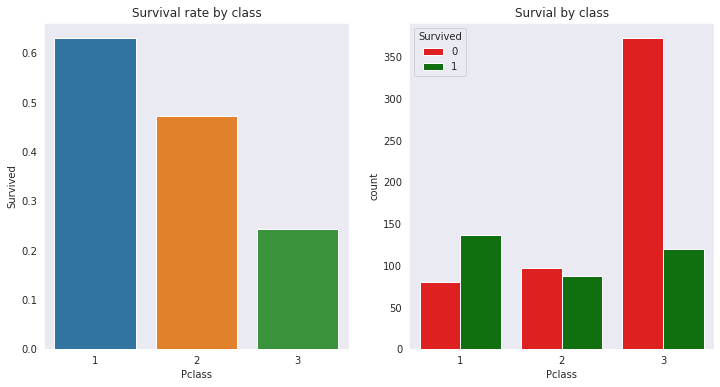

In [15]:
fig, axarr = plt.subplots(1,2,figsize=(12,6))
a = sns.countplot(x='Pclass',hue= 'Survived',data=train_data, palette = ('red','green'),ax=axarr[1]).set_title('Survial by class')
b = sns.barplot(x='Pclass',y='Survived',data=train_data,ci=None,ax=axarr[0]).set_title('Survival rate by class')

* We can clearly see that the titanic contained three different classes
* From the abvoe graphs we can see that the survivial rate of 1st class is more than 60 percent and that od the second class was more than 60 percent. But more than 75 percent of the passengers in 3rd class did not survive.
* Clearly this is an important factor to consider during modelling 

### Pclass and Sex

In [16]:
train_data.groupby(['Pclass','Sex'])['Survived'].mean().to_frame()

Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447

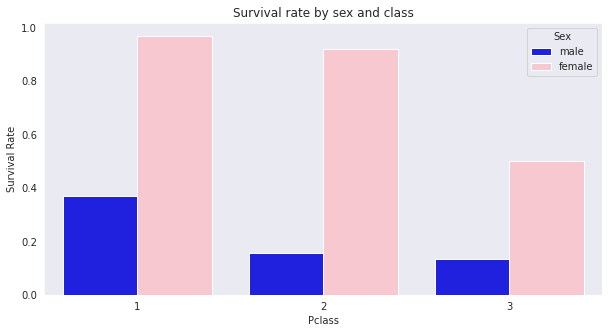

In [17]:
plt.figure(figsize=[10,5])
plt.title('Survival rate by sex and class')
g = sns.barplot(x='Pclass',y='Survived',hue='Sex',data=train_data,ci=None,palette=('blue','pink')).set_ylabel('Survival Rate')

* Although we see a great deal of women survivors we see that there is a discrepnacy even in their survivial, where 1st and 2nd class women had a survival rate of above 90 per cent and the women in the third class had a marginal 50 per-cent survival rate.
* This is still higher than the survivial rate of men in general where even the first-class men had only a 37 percent survival rate. 

### Age

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


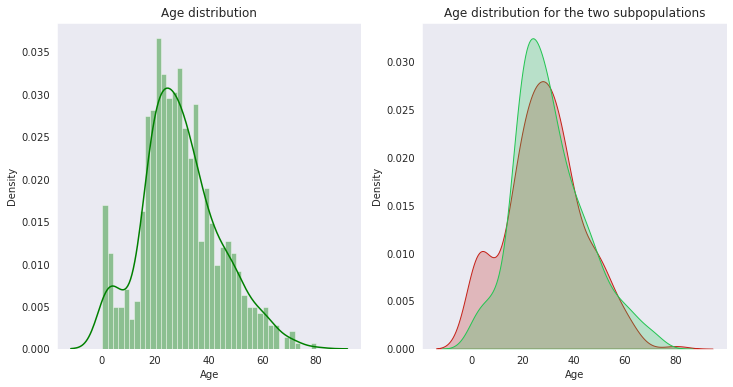

In [18]:
fig, axarr = plt.subplots(1,2,figsize=(12,6))
axarr[0].set_title('Age distribution')
f = sns.distplot(train_data['Age'], color='g', bins=40, ax=axarr[0])
axarr[1].set_title('Age distribution for the two subpopulations')
g = sns.kdeplot(train_data['Age'].loc[train_data['Survived'] == 1], color='#C52219',
                shade= True, ax=axarr[1], label='Survived').set_xlabel('Age')
g = sns.kdeplot(train_data['Age'].loc[train_data['Survived'] == 0], color='#23C552',
                shade=True, ax=axarr[1], label='Not Survived')

### Age and Sex

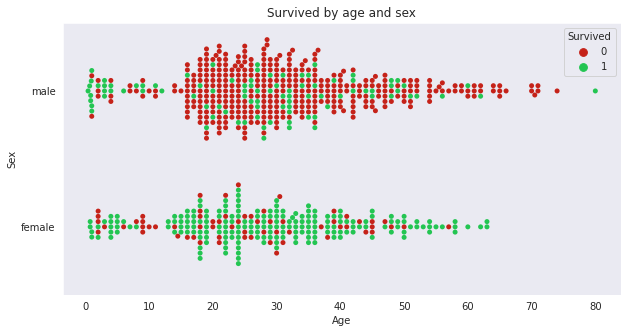

In [19]:
plt.figure(figsize=(10,5))
g = sns.swarmplot(y='Sex', x='Age', hue='Survived', palette=('#C52219', '#23C552'), data=train_data).set_title('Survived by age and sex')

### Fare

In [20]:
train_data.Fare.describe().to_frame()

,Fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


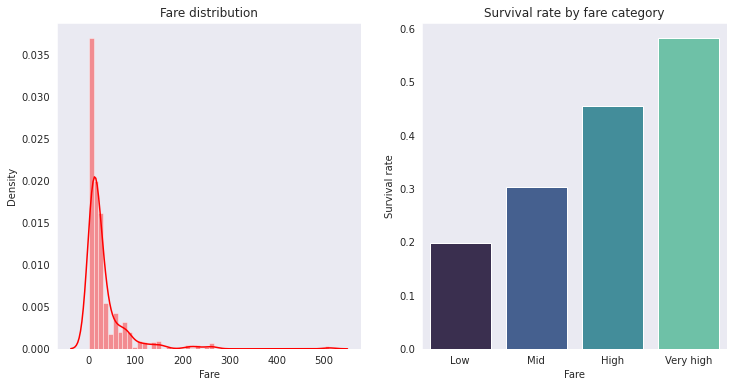

In [21]:
fig, axarr = plt.subplots(1,2,figsize=(12,6))
g = sns.distplot(train_data['Fare'], color='r', ax = axarr[0]).set_title('Fare distribution')
fare_ranges = pd.qcut(train_data.Fare, 4, labels = ['Low', 'Mid', 'High', 'Very high'])
axarr[1].set_title('Survival rate by fare category')
g = sns.barplot(x=fare_ranges, y=train_data.Survived, palette='mako', ci=None, ax=axarr[1]).set_ylabel('Survival rate')

### Fares and Sex

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 57.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 32.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


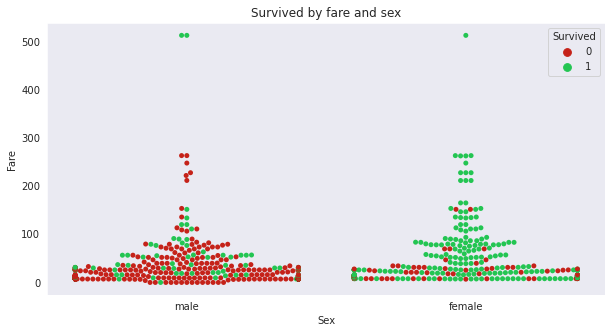

In [22]:
plt.figure(figsize=(10,5))
a = sns.swarmplot(x='Sex', y='Fare', hue='Survived', palette=('#C52219', '#23C552'), data=train_data).set_title('Survived by fare and sex')

### Embarked

In [23]:
train_data['Embarked'].value_counts().to_frame()

,Embarked
S,644
C,168
Q,77


In [24]:
train_data.groupby('Embarked')['Survived'].mean().to_frame()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


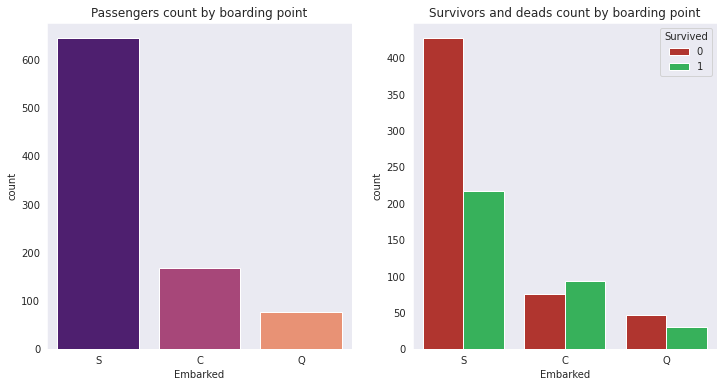

In [25]:
fig, axarr = plt.subplots(1,2,figsize=(12,6))
sns.countplot(train_data['Embarked'], palette='magma', ax=axarr[0]).set_title('Passengers count by boarding point')
p = sns.countplot(x = 'Embarked', hue = 'Survived', data = train_data, palette=('#C52219', '#23C552'),ax=axarr[1]).set_title('Survivors and deads count by boarding point')


* Embarked class tells us where the passenger has boarded from
* There are three possible embarkment cities for it: Southhampton, Cherbourg and Queenstown
* In the training data, more than 70% of the people boarded from Southampton, slightly under 20% from Cherbourg and the rest from Queenstown.
* Counting survivors by boarding point, we see that more people who embarked from Cherbourg survived than those who died.
* People who Embarked from Southampton, most of them couldn't survive the disaster.

### Embarked and Pclass

In [26]:
train_data.groupby(['Embarked','Pclass']).Survived.sum().to_frame()

Survived
Embarked Pclass          
C        1             59
         2              9
         3             25
Q        1              1
         2              2
         3             27
S        1             74
         2             76
         3             67

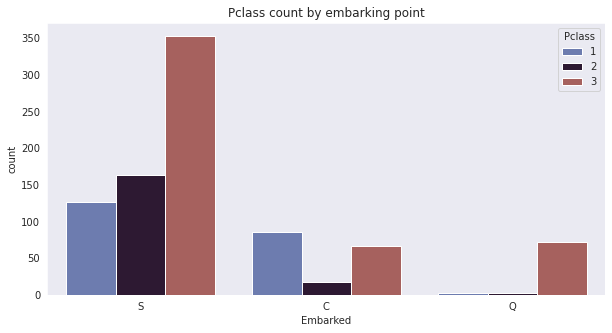

In [27]:
plt.figure(figsize=(10,5))
g = sns.countplot(data=train_data, x='Embarked', hue='Pclass', palette="twilight").set_title('Pclass count by embarking point')

* Since we don't expect that a passenger's boarding point could change the chance of surviving, we guess this is probably due to the higher proportion of first and second class passengers for those who came from Cherbourg rather than Queenstown and Southampton.
* To check this, we see the class distribution for the different embarking points.
* The claim is correct and hopefully justifies why that survival rate is so high at Cherbourg
* Again this feature might be useful in detecting groups at a deeper level of a tree and this is the only reason why I keep it.
* Also, most of the 3rd class people have Embarked from Southampton and died.
* And there is only 1 person from 1st class and 2 person from 2nd class Embarked from Queenstown.


### Name

In [28]:
train_data['Title'] = train_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
test_data['Title'] = test_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [29]:
train_data['Title'].value_counts().to_frame()

,Title
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Mlle,2
Col,2
Major,2
Sir,1


In [30]:
test_data['Title'].value_counts().to_frame()

,Title
Mr,240
Miss,78
Mrs,72
Master,21
Rev,2
Col,2
Dr,1
Ms,1
Dona,1


In [31]:
train_data['Title'].replace(['Mme', 'Ms', 'Lady', 'Mlle', 'the Countess', 'Dona'], 'Miss', inplace=True)
test_data['Title'].replace(['Mme', 'Ms', 'Lady', 'Mlle', 'the Countess', 'Dona'], 'Miss', inplace=True)
train_data['Title'].replace(['Major', 'Col', 'Capt', 'Don', 'Sir', 'Jonkheer'], 'Mr', inplace=True)
test_data['Title'].replace(['Major', 'Col', 'Capt', 'Don', 'Sir', 'Jonkheer'], 'Mr', inplace=True)

In [32]:
train_data.groupby('Title').Survived.mean()

Title
Dr        0.428571
Master    0.575000
Miss      0.707447
Mr        0.160000
Mrs       0.792000
Rev       0.000000
Name: Survived, dtype: float64

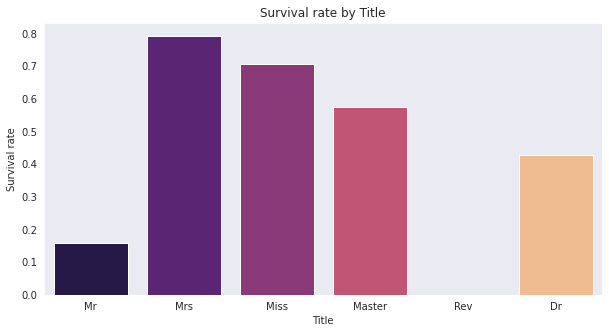

In [33]:
plt.figure(figsize=(10,5))
plt.title('Survival rate by Title')
g = sns.barplot(x='Title', y='Survived', palette="magma", ci=None, data=train_data).set_ylabel('Survival rate')

### Cabin and Ticket

In [34]:
train_data['Ticket_lett'] = train_data.Ticket.apply(lambda x: x[:2])
test_data['Ticket_lett'] = test_data.Ticket.apply(lambda x: x[:2])

In [35]:
train_data['Ticket_len'] = train_data.Ticket.apply(lambda x: len(x))
test_data['Ticket_len'] = test_data.Ticket.apply(lambda x: len(x))

* The Cabin feature is somewhat problematic as there are many missing values.
* We can not expect it to help our model too much.
* On the other side, a correctly engineered Ticket column is the best way to find family groups.
* Since it is a pity to delete it knowing its full potential, we can create two new columns; one for the ticket first two letters and the second one for the ticket length.

### SibSp

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


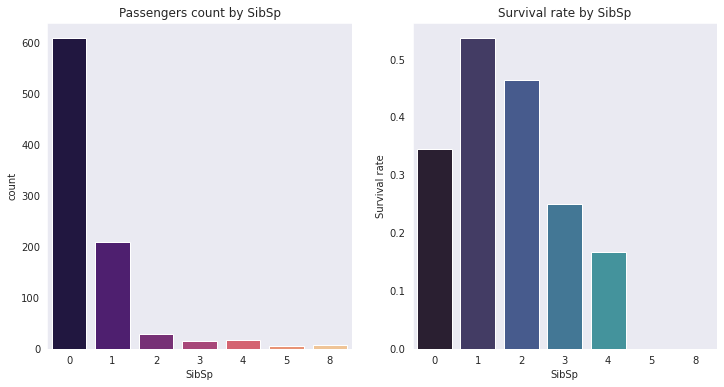

In [36]:
fig, axarr = plt.subplots(1,2,figsize=(12,6))
a = sns.countplot(train_data['SibSp'], palette="magma", ax=axarr[0]).set_title('Passengers count by SibSp')
axarr[1].set_title('Survival rate by SibSp')
b = sns.barplot(x='SibSp', y='Survived', data=train_data, palette="mako", ci=None, ax=axarr[1]).set_ylabel('Survival rate')

<AxesSubplot:title={'center':'Survival rate by SibSp'}, xlabel='SibSp', ylabel='count'>

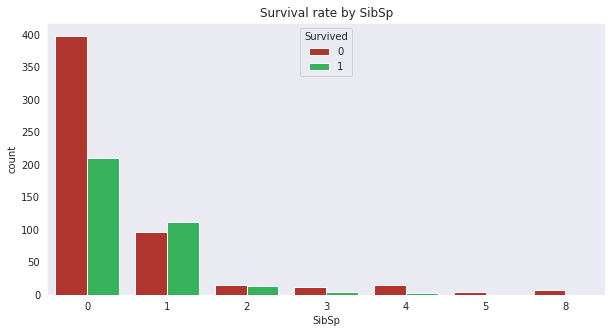

In [37]:
plt.figure(figsize = [10,5])
plt.title('Survival rate by SibSp')
sns.countplot(x='SibSp', hue='Survived', palette=('#C52219', '#23C552'), data=train_data)


* SibSp is the number of siblings or spouses of a person aboard the Titanic.
* We see that more than 90% of people traveled alone or with one sibling or spouse.
* The survival rate between the different categories is a bit confusing but we see that the chances of surviving are lower for those who traveled alone or with more than 2 siblings.
* Furthermore, we notice that no one from a big family with 5 or 8 siblings was able to survive.

### Parch

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


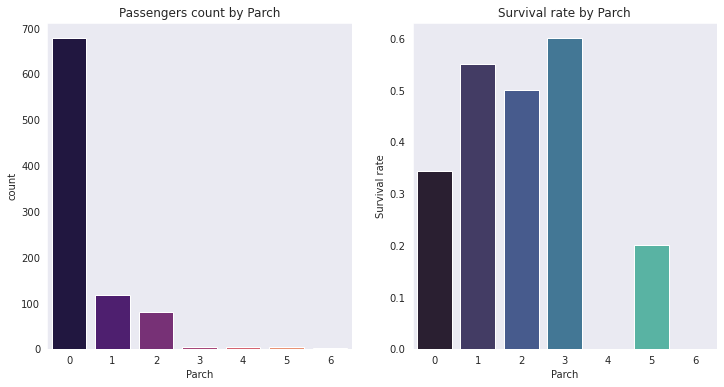

In [38]:
fig, axarr = plt.subplots(1,2,figsize=(12,6))
a = sns.countplot(train_data['Parch'], palette="magma", ax=axarr[0]).set_title('Passengers count by Parch')
axarr[1].set_title('Survival rate by Parch')
b = sns.barplot(x='Parch', y='Survived', data=train_data, palette="mako", ci=None, ax=axarr[1]).set_ylabel('Survival rate')

<AxesSubplot:title={'center':'Survival rate by Parch'}, xlabel='Parch', ylabel='count'>

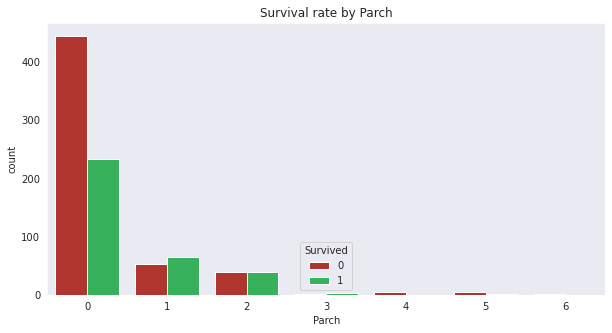

In [39]:
plt.figure(figsize = [10,5])
plt.title('Survival rate by Parch')
sns.countplot(x='Parch', hue='Survived', palette=('#C52219', '#23C552'), data=train_data)

* Similar to the SibSp column, this feature contains the number of parents or children each passenger was traveling with.
* Here we draw the same conclusions as SibSp; we see again that small families had more chances to survive than bigger ones and passengers who traveled alone.

### Family Size 

In [40]:
train_data['Fam_size'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['Fam_size'] = test_data['SibSp'] + test_data['Parch'] + 1

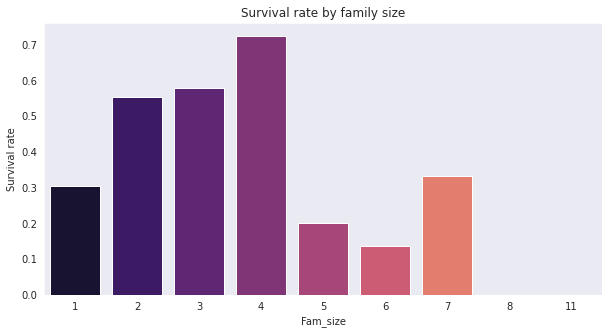

In [41]:
plt.figure(figsize=(10,5))
plt.title('Survival rate by family size')
g = sns.barplot(x='Fam_size', y='Survived', palette="magma", ci=None, data=train_data).set_ylabel('Survival rate')

<AxesSubplot:title={'center':'Survival rate by family size'}, xlabel='Fam_size', ylabel='count'>

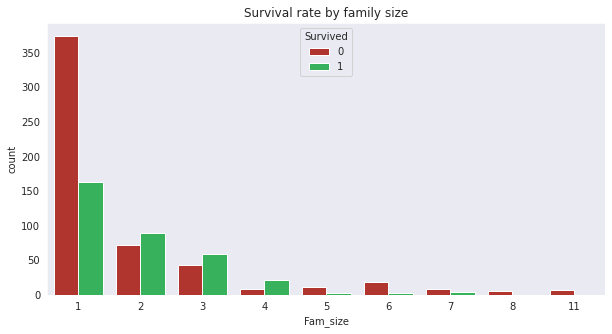

In [42]:
plt.figure(figsize=(10,5))
plt.title('Survival rate by family size')
sns.countplot(x='Fam_size', hue='Survived', data=train_data, palette=('#C52219', '#23C552'))

* Since we have two seemingly weak predictors, one thing we can do is combine them to get a stronger one.
* In the case of SibSp and Parch, we can join the two variables to get a family size feature, which is the sum of SibSp, Parch and 1 (who is the passenger himself).
* Creation of a new Fam_size column

### Family Type

In [43]:
# Creation of four groups
train_data['Fam_type'] = pd.cut(train_data.Fam_size, [0,1,4,7,11], labels=['Solo', 'Small', 'Big', 'Very big'])
test_data['Fam_type'] = pd.cut(test_data.Fam_size, [0,1,4,7,11], labels=['Solo', 'Small', 'Big', 'Very big'])

A uniqiue pattern emerges which corelates to family size and survival rate

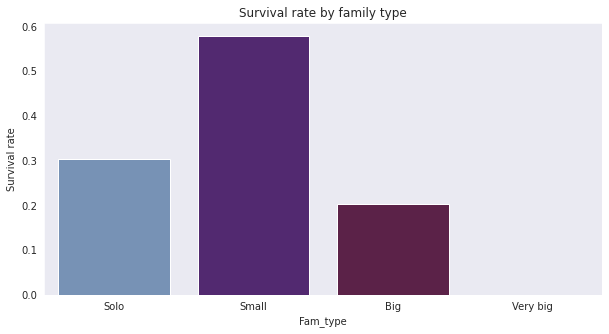

In [44]:
plt.figure(figsize=(10,5))
plt.title('Survival rate by family type')
g = sns.barplot(x=train_data.Fam_type, y=train_data.Survived, palette='twilight', ci=None).set_ylabel('Survival rate')

<AxesSubplot:title={'center':'Survival rate by family type'}, xlabel='Fam_type', ylabel='count'>

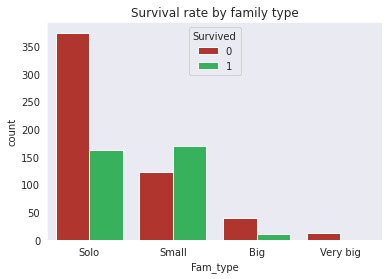

In [45]:
plt.title('Survival rate by family type')
sns.countplot(x='Fam_type', hue='Survived', data=train_data, palette=('#C52219', '#23C552'))

### Modelling

In [46]:
y = train_data['Survived']
features = ['Pclass', 'Fare', 'Title', 'Embarked', 'Fam_type', 'Ticket_len', 'Ticket_lett']
X = train_data[features]
X.head()


,Pclass,Fare,Title,Embarked,Fam_type,Ticket_len,Ticket_lett
0,3,7.2500,Mr,S,Small,9,A/
1,1,71.2833,Mrs,C,Small,8,PC
2,3,7.9250,Miss,S,Solo,16,ST
3,1,53.1000,Mrs,S,Small,6,11
4,3,8.0500,Mr,S,Solo,6,37


#### We will now create a pipeline to handle the missing data

In [47]:
numerical_cols = ['Fare']
categorical_cols = ['Pclass', 'Title', 'Embarked', 'Fam_type', 'Ticket_len', 'Ticket_lett']

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='median')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Bundle preprocessing and modeling code 
titanic_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(random_state=0, n_estimators=500, max_depth=5))
])

# Preprocessing of training data, fit model 
titanic_pipeline.fit(X,y)

print('Cross validation score: {:.3f}'.format(cross_val_score(titanic_pipeline, X, y, cv=10).mean()))

dtype('int64')